<a href="https://colab.research.google.com/github/19f19245/Manal-Al-abdu-salam/blob/19f19245-patch-2/copy_of_horse_camel_classification_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout


In [28]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [31]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/camel')))
print(len(os.listdir('/content/drive/MyDrive/train/horse')))
print(len(os.listdir('/content/drive/MyDrive/test/camel')))
print(len(os.listdir('/content/drive/MyDrive/test/horse')))

180
180
20
20


In [33]:

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 288 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [35]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [36]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [37]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
9/9 [==============================] - 69s 7s/step - loss: 1.2097 - accuracy: 0.5243 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/30
9/9 [==============================] - 51s 6s/step - loss: 0.6811 - accuracy: 0.5625 - val_loss: 0.6420 - val_accuracy: 0.7083
Epoch 3/30
9/9 [==============================] - 57s 6s/step - loss: 0.6261 - accuracy: 0.6806 - val_loss: 0.6085 - val_accuracy: 0.6111
Epoch 4/30
9/9 [==============================] - 49s 5s/step - loss: 0.5286 - accuracy: 0.7465 - val_loss: 0.6525 - val_accuracy: 0.6806
Epoch 5/30
9/9 [==============================] - 51s 6s/step - loss: 0.4867 - accuracy: 0.7743 - val_loss: 0.6409 - val_accuracy: 0.5833
Epoch 6/30
9/9 [==============================] - 53s 6s/step - loss: 0.4204 - accuracy: 0.8229 - val_loss: 0.6568 - val_accuracy: 0.6250
Epoch 7/30
9/9 [==============================] - 52s 6s/step - loss: 0.3680 - accuracy: 0.8438 - val_loss: 0.6206 - val_accuracy: 0.6111
Epoch 8/30
9/9 [==================

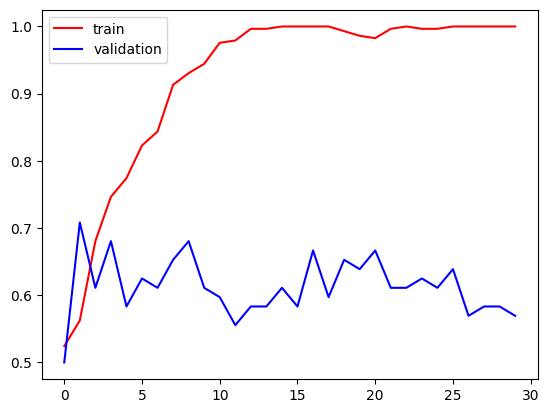

In [38]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

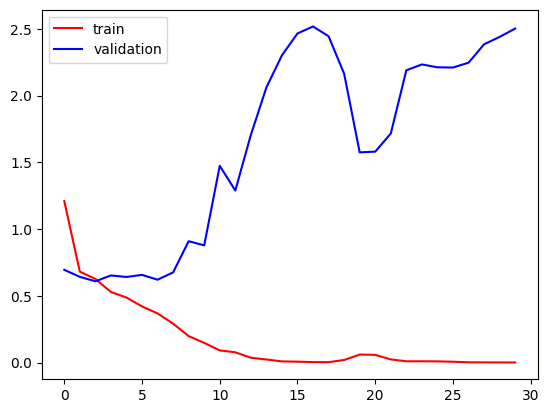

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [40]:


resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [41]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [44]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

2/2 [==============================] - 14s 2s/step
[[0.99966484]
 [0.99974424]
 [0.9998509 ]
 [0.99956906]
 [0.99964744]
 [0.99962705]
 [0.9997784 ]
 [0.9996184 ]
 [0.9997196 ]
 [0.9996668 ]
 [0.99973327]
 [0.999603  ]
 [0.99977356]
 [0.99967694]
 [0.9995745 ]
 [0.9998152 ]
 [0.99982613]
 [0.999713  ]
 [0.99972117]
 [0.9996679 ]
 [0.9997082 ]
 [0.9998217 ]
 [0.9994152 ]
 [0.99976635]
 [0.9998116 ]
 [0.9996955 ]
 [0.99983305]
 [0.9996656 ]
 [0.99944854]
 [0.9996967 ]
 [0.9998946 ]
 [0.9998907 ]
 [0.9999472 ]
 [0.99984413]
 [0.9997612 ]
 [0.99971527]
 [0.99981934]
 [0.9996787 ]
 [0.9995755 ]
 [0.99942446]]


In [45]:
len(predictions)

40

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 0 20]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
